<a href="https://colab.research.google.com/github/SARIKELLA-MADHU/Machine-Learning/blob/main/ML_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

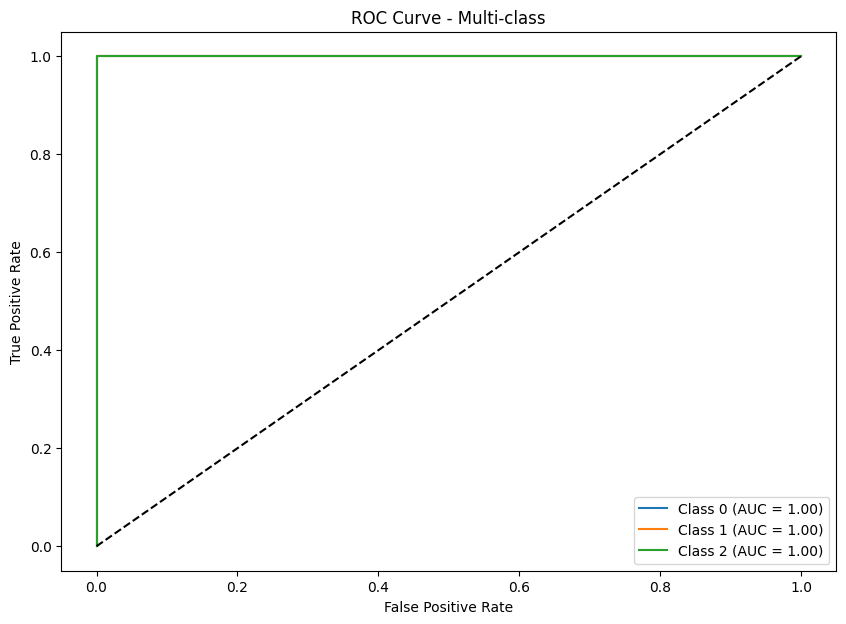

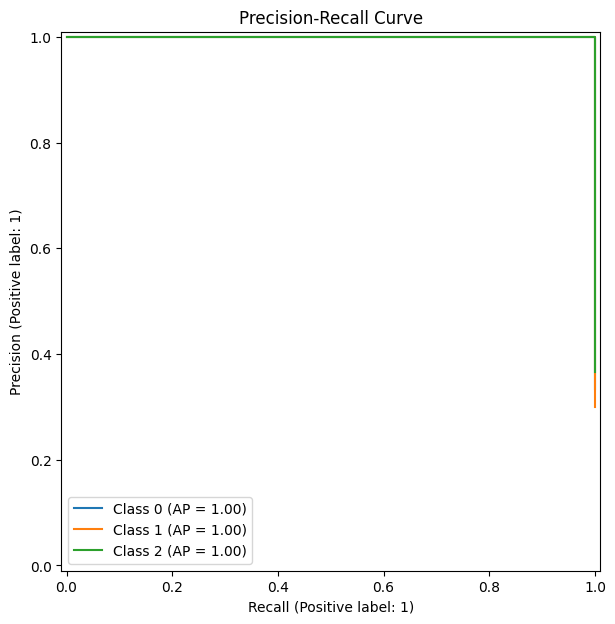

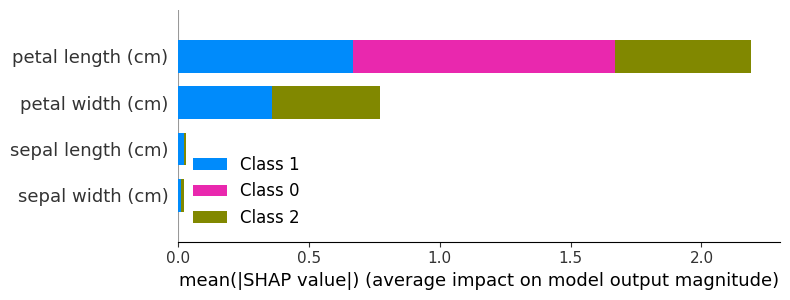

In [15]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
from sklearn.preprocessing import label_binarize
import shap
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Ensure all possible classes are considered for binarization
all_classes = np.unique(y)
y_test_bin = label_binarize(y_test, classes=all_classes)
y_score = search.predict_proba(X_test)

# Ensure y_score has columns for all classes, even if some are missing in y_test
# This is a more robust way to handle potential class mismatches after prediction
# Create a placeholder array with zeros for all classes
y_score_full = np.zeros((y_score.shape[0], len(all_classes)))

# Map the columns of y_score to the correct class indices in y_score_full
# Assuming the order of columns in y_score corresponds to the order of classes in search.best_estimator_.classes_
model_classes = search.best_estimator_.classes_
for i, class_label in enumerate(model_classes):
    if class_label in all_classes:
        class_index_in_all = np.where(all_classes == class_label)[0][0]
        y_score_full[:, class_index_in_all] = y_score[:, i]

y_score = y_score_full
n_classes = y_test_bin.shape[1]


# ROC Curve
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    # Check if the class exists in y_test_bin (i.e., the column is not all zeros)
    if np.sum(y_test_bin[:, i]) > 0:
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        # Check if AUC can be calculated (requires at least one positive and one negative sample)
        if len(np.unique(y_test_bin[:, i])) > 1:
             auc = roc_auc_score(y_test_bin[:, i], y_score[:, i])
             plt.plot(fpr, tpr, label=f'Class {all_classes[i]} (AUC = {auc:.2f})')
        else:
            plt.plot(fpr, tpr, label=f'Class {all_classes[i]} (AUC not applicable)')

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve - Multi-class")
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    # Check if the class exists in y_test_bin
     if np.sum(y_test_bin[:, i]) > 0:
        PrecisionRecallDisplay.from_predictions(y_test_bin[:,i], y_score[:,i], name=f"Class {all_classes[i]}", ax=plt.gca())

plt.title("Precision-Recall Curve")
plt.show()


# SHAP Values (using X_test for efficiency)
try:
    explainer = shap.Explainer(search.best_estimator_)
    # Using a smaller sample for SHAP summary plot for potentially large datasets
    # Adjust n_samples as needed based on your dataset size and computational resources
    shap_values = explainer(X_test)
    shap.summary_plot(shap_values, X_test)
except Exception as e:
    print(f"Could not generate SHAP plot: {e}")

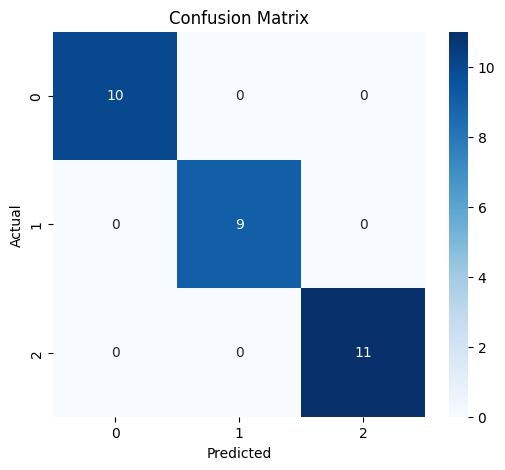

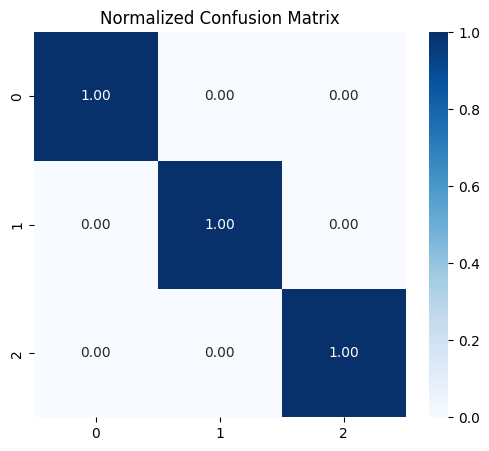

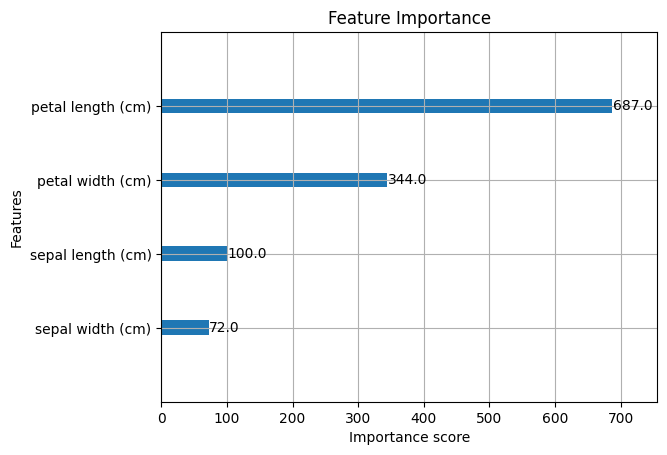

In [12]:
# -------------------------------
# Part 2: Evaluation Plots
# -------------------------------

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Normalized confusion matrix
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(6,5))
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap='Blues')
plt.title("Normalized Confusion Matrix")
plt.show()

# Feature importance
xgb.plot_importance(search.best_estimator_, max_num_features=5, importance_type='weight')
plt.title("Feature Importance")
plt.show()
